# DSC 680
# Project 1
# Sarah Theriot

# Step 1: Import libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xlrd

# Step 2: Load Dataset

In [9]:
file_path = r"C:\Users\sarah\FLWVCdata.xls"
df = pd.read_excel(file_path)

df.head()

,ParkName,ParkCode,Month,Year,Park_or_Thru_Road,CommonName,LatinName,Family,Class,Individuals,County,ParkLatitude,ParkLongitude,Total.Thru.Park_km,Total.In.Park_km,attendance,Area_ha
0,Alafia River State Park,Ala_Riv,2,2008,P,Chuck Wills Widow,Antrostomus carolinensis,Caprimulgidae,Aves,1,Hillsborough,27.773399,-82.120102,10.0,38.8,5951.0,3121.72998
1,Alafia River State Park,Ala_Riv,10,2006,T,Great horned owl,Bubo virginianus,Strigidae,Aves,1,Hillsborough,27.773399,-82.120102,10.0,38.8,4927.0,3121.72998
2,Alafia River State Park,Ala_Riv,3,2007,T,Red shoulder hawk,Buteo lineatus,Accipitridae,Aves,1,Hillsborough,27.773399,-82.120102,10.0,38.8,6804.0,3121.72998
3,Alafia River State Park,Ala_Riv,4,2007,T,Red shoulder hawk,Buteo lineatus,Accipitridae,Aves,1,Hillsborough,27.773399,-82.120102,10.0,38.8,5250.0,3121.72998
4,Alafia River State Park,Ala_Riv,10,2012,T,Red shoulder hawk,Buteo lineatus,Accipitridae,Aves,1,Hillsborough,27.773399,-82.120102,10.0,38.8,4644.0,3121.72998


In [11]:
# Check column names
df.columns

Index(['ParkName', 'ParkCode', 'Month', 'Year', 'Park_or_Thru_Road',
       'CommonName', 'LatinName', 'Family', 'Class', 'Individuals', 'County',
       'ParkLatitude', 'ParkLongitude', 'Total.Thru.Park_km',
       'Total.In.Park_km', 'attendance', 'Area_ha'],
      dtype='object')

# Step 3: Clean Dataset

In [13]:
# Drop rows missing key info
df_clean = df.dropna(subset=["ParkName", "CommonName", "Individuals", "Year", "Month"])

# Make sure types are correct
df_clean["Year"] = df_clean["Year"].astype(int)
df_clean["Month"] = df_clean["Month"].astype(int)
df_clean["Individuals"] = df_clean["Individuals"].astype(int)

# Quick shape check
df_clean.shape

(9254, 17)

# Step 4: Create Visualizations

## Visual 1: Top 10 Florida State Parks by Wildlife Collisions

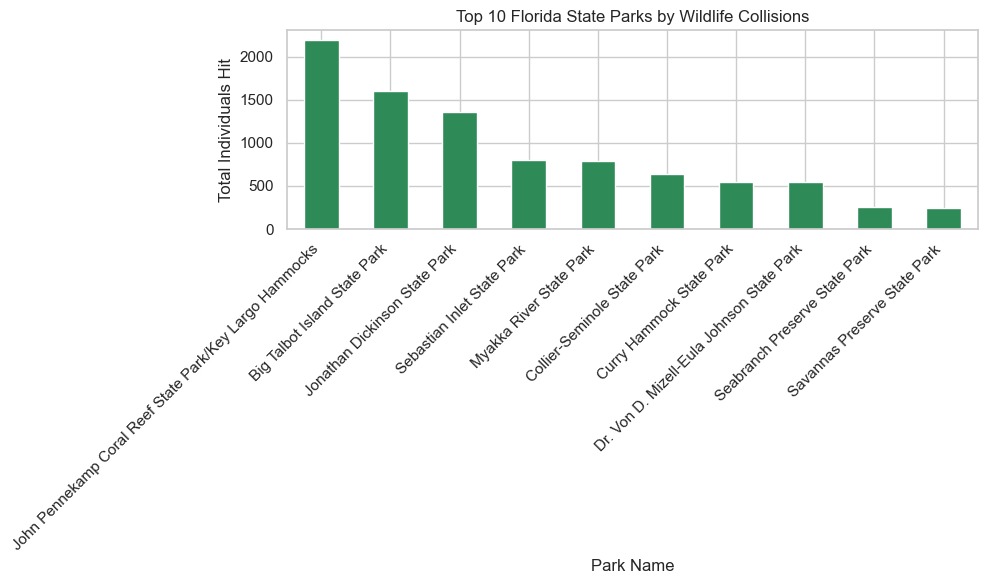

In [16]:
# Group by park and sum up the number of animals hit
collisions_by_park = df_clean.groupby("ParkName")["Individuals"].sum().sort_values(ascending=False).head(10)

# Plot it
collisions_by_park.plot(kind="bar", color="seagreen")
plt.title("Top 10 Florida State Parks by Wildlife Collisions")
plt.xlabel("Park Name")
plt.ylabel("Total Individuals Hit")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Visual 2: Wildlife Collisions by Month

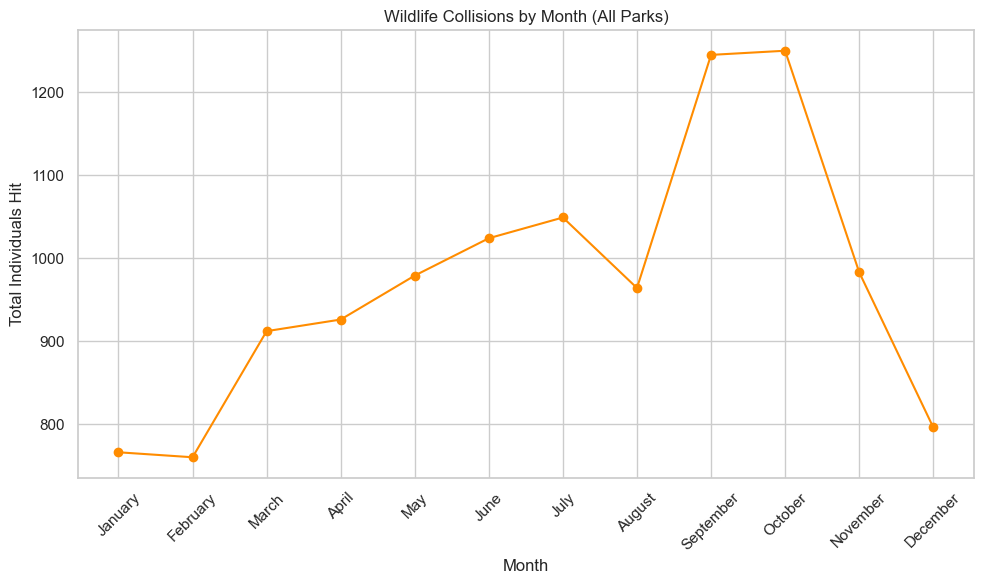

In [21]:
import calendar # This is to assist in chart readability

# Same grouping by month
collisions_by_month = df_clean.groupby("Month")["Individuals"].sum()
collisions_by_month = collisions_by_month.reindex(range(1, 13))

# Get month names from calendar module
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot with month names as x-ticks
collisions_by_month.plot(kind="line", marker="o", color="darkorange")
plt.title("Wildlife Collisions by Month (All Parks)")
plt.xlabel("Month")
plt.ylabel("Total Individuals Hit")
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Visual 3: Attendance v. Wildlife Collisions

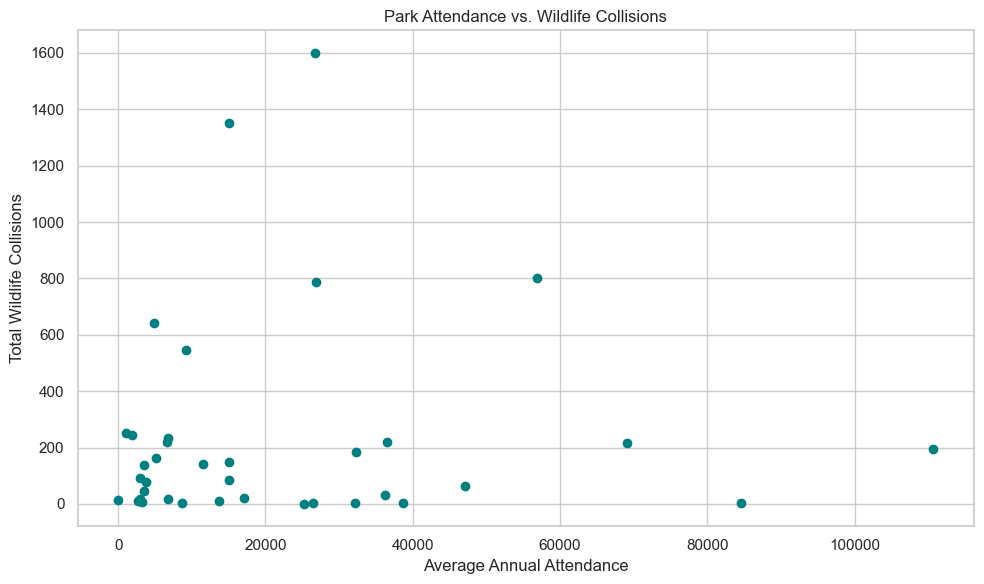

In [23]:
# Group by park: sum Individuals and get mean attendance (attendance varies by month/year)
park_summary = df_clean.groupby("ParkName").agg({
    "Individuals": "sum",
    "attendance": "mean"
}).reset_index()

# Scatter plot: attendance vs collisions
plt.scatter(park_summary["attendance"], park_summary["Individuals"], color="teal")
plt.title("Park Attendance vs. Wildlife Collisions")
plt.xlabel("Average Annual Attendance")
plt.ylabel("Total Wildlife Collisions")
plt.grid(True)
plt.tight_layout()
plt.show()

## Visual 4: Collisions by Road Type (Park vs. Thru Road)

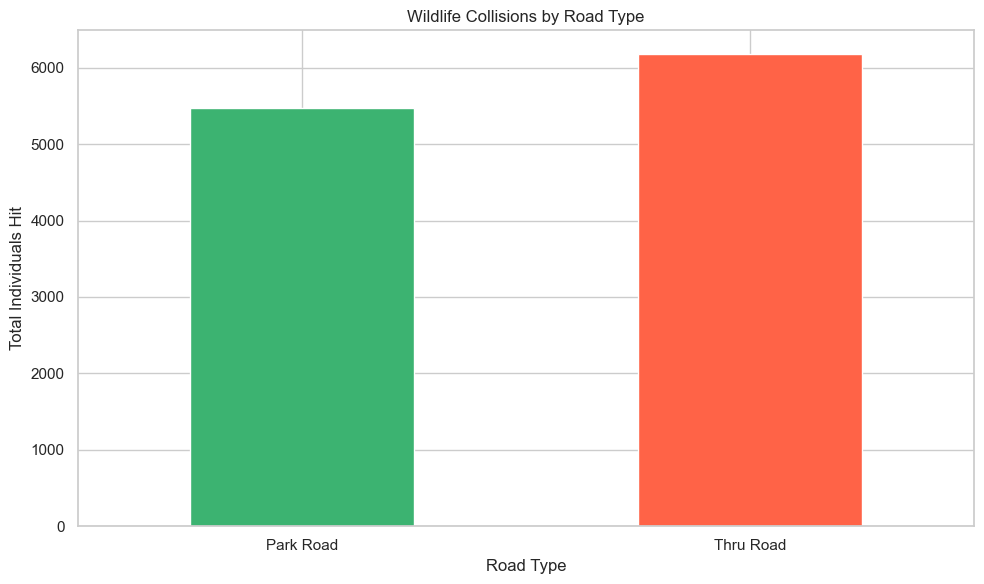

In [25]:
# Group by road type and sum individuals hit
collisions_by_road = df_clean.groupby("Park_or_Thru_Road")["Individuals"].sum()

# Plot as bar chart
collisions_by_road.plot(kind="bar", color=["mediumseagreen", "tomato"])
plt.title("Wildlife Collisions by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Total Individuals Hit")
plt.xticks(ticks=[0,1], labels=["Park Road", "Thru Road"], rotation=0)
plt.tight_layout()
plt.show()

## Visual 5: Top Species Hit by Wildlife Collisions

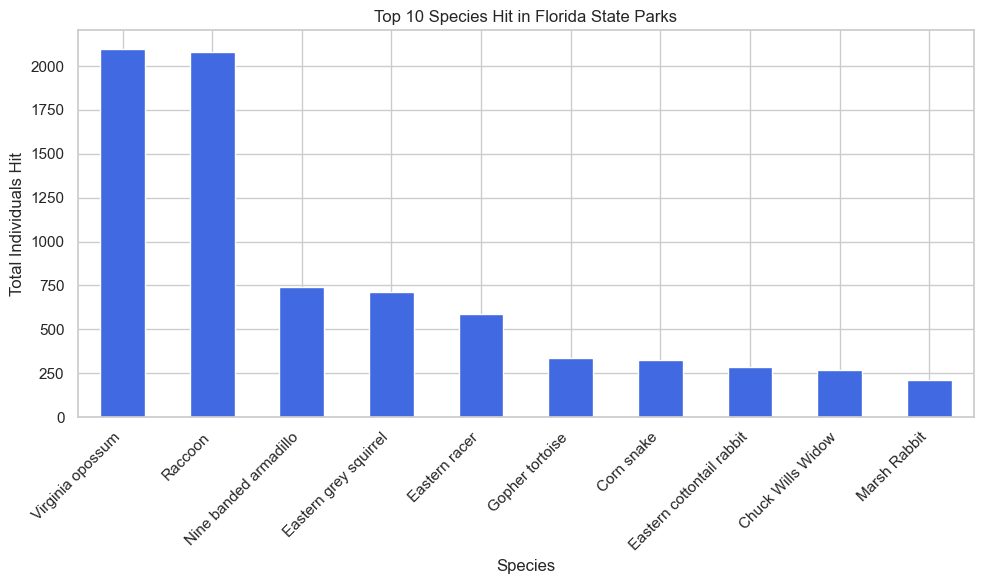

In [27]:
# Sum individuals hit by species (CommonName)
species_collisions = df_clean.groupby("CommonName")["Individuals"].sum().sort_values(ascending=False).head(10)

# Plot bar chart
species_collisions.plot(kind="bar", color="royalblue")
plt.title("Top 10 Species Hit in Florida State Parks")
plt.xlabel("Species")
plt.ylabel("Total Individuals Hit")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()